# _`expression`_.`automaton(`_`algo`_`="auto")`

Generate an automaton from an expression.

The _`algo`_ can be:
- `"auto"`: currently equivalent to `"derived_term"`, eventually should mix `"standard"` for basic expression (faster) and `"derived_term"` otherwise (more general).
- `"derived_term"`: use [_expression_.derived_term](expression.derived_term.ipynb), stripped.
- `"standard"`: use [_expression_.standard](expression.standard.ipynb).
- `"thompson"`: use [_expression_.thompson](expression.thompson.ipynb).
- `"zpc"`: use [_expression_.zpc](expression.zpc.ipynb).
- `"zpc_compact"`: use [_expression_.zpc](expression.zpc.ipynb), "compact" version.

See also:
- [_expression_.derived_term](expression.derived_term.ipynb)
- [_expression_.standard](expression.standard.ipynb)
- [_expression_.thompson](expression.thompson.ipynb)
- [_expression_.zpc](expression.zpc.ipynb)

## Examples

In [1]:
import vcsn
e = vcsn.Z.expression('\e+<2>a+<3>b')
e

:0: FutureWarning: IPython widgets are experimental and may change in the future.


<IPython.core.display.Javascript object>

\e+<2>a+<3>b

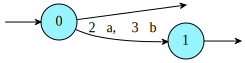

In [2]:
e.automaton('derived_term')

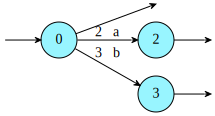

In [3]:
e.automaton('standard')

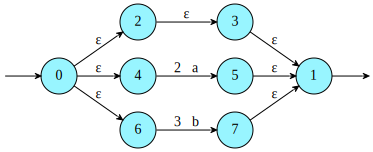

In [4]:
e.automaton('thompson')

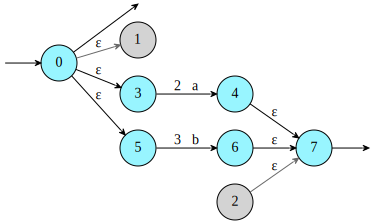

In [5]:
e.automaton('zpc')

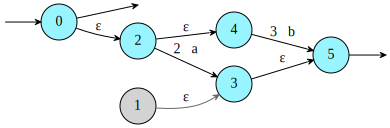

In [6]:
e.automaton('zpc_compact')